In [1]:
from scipy import *
import matplotlib.pyplot as plt
from scipy.misc import comb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Maximum likelihood estimation

### Some background

Imagine that we are tossing a coin with a probability $p$ of landing heads-up. If we flip the coin $n$ times, the probability of getting the coin heads up $k$ times is then

$$ P(X=k|n,p) = \binom n k p^k (1-p)^{n-k} $$

The binomial coefficient is 

$$ \binom n k = \frac{n!}{k!(n-k)!}.$$

The reason for the binomial coefficient's appearance is that out of the $n$ trials, $k$ of them are successes. Those $k$ successes can appear in any combination. 

To derive the binomial coefficient our approach is to start by counting the permutations from the perspective that every coin toss has a distinct outcome, and later generalise it to just two outcomes, heads and tails. How many ways are there to arrange all the distinct outcomes? 

Let us consider a simple case where there are $n=3$ trials and we desire $k=2$ heads. If order is important, then we would have six *permutations*, i.e. $H_1 H_2 T$, $H_1 T H_2$, $H_2 H_1 T$, $H_2 T H_1$, $T H_1 H_2$, $T H_2 H_1$. But if order isn't important, then we only have one possible *combination* of $(H_1, H_2, T)$. Moral of the story: if order isn't important, the probability space is reduced by a factor of $k!$.

How many ways can we get $k$ heads from $n$ coin tosses? Before the first coin toss, any one of the $n$ tosses could be assigned to heads. But once the toss is over, the probability space reduces to $n-1$ tosses. Going this way we then have

$$ {\rm comb} = n \times (n-1) \times ... (n-k) = \frac{n!}{(n-k)!}, $$

where $k! = 1\times 2 \times... k.$

Combining these two facts tells us that the number of combinations to choose $k$ heads out of $n$ coin tosses is 

$$ \frac{n!}{k!(n-k)!} \equiv \binom n k. $$

### The likelihood function

The function that we introduced earlier 

$$ f(k\,|\,n,p) $$

is a way to denote "what is the probability of obtaining $k$ heads, given that there are $n$ total tosses and a probability $p$ of winning the toss"? In other words, we are trying to calculate an outcome based on some known condition. 

The concept of likelihood estimation is the inverse problem. Instead, we define the likelihood function

$$ L(p\,|\,k). $$

For example, if we toss $n=10$ coins and just $k=1$ of them turn out to be heads, what is the probability that the coin is biased in favour of heads, i.e. $p > 1/2$? The likelihood function is then

$$ L(p\,|\,k) = f(k\, | \, p) $$

Actually, the equality is a little confusing. Even though the numbers are numerically equal, the functions cannot be directly compared in the sense that the likelihood $L$ is defined on the observed data, and the probability density function $f$ is defined on statistical parameters. 

In [2]:
def L(k, n, p=0.5):
    return comb(n,k)*p**k *(1-p)**(n-k)

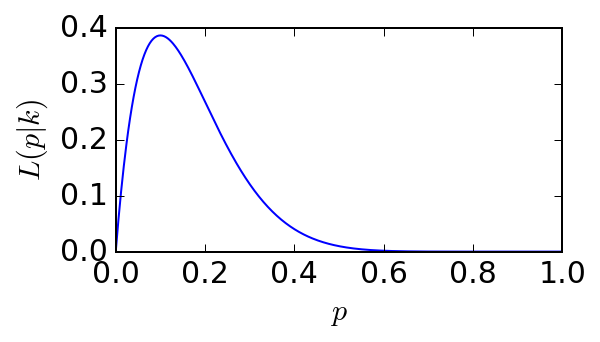

In [3]:
# Likelihood function of a Bernoulli trial (coin toss)
p_list = linspace(0,1,500)
l_list = [L(1,10,p) for p in p_list]
plt.figure(figsize=(4,2))
plt.rcParams['font.size']=15
plt.plot(p_list,l_list)
plt.xlabel('$p$')
plt.ylabel('$L(p|k)$')
plt.yticks([0,0.1,0.2,0.3,0.4]);

### Maximum likelihood estimate

The principle of maximum likelihood estimation is that the ideal probability function $f(k\,|\,p)$ is the one in which the likelihood function is maximum, and therefore makes the observed data most likely. 

To do this we differentiate the likelihood equation $L(p\,|\,k)$ over the parameter that we wish to evaluate, which is $p$. It is customary to take the derivative of $\ln L$, rather than $L$, because it is mathematically tractable, and because $L<1$, both $L$ and $\ln L$ are monotonically related to each other. Thus we seek

$$ \frac{\partial}{\partial p} L(p\,|\,k) = 0. $$

Setting the derivative zero only guarantees that a turning point might be found -- this point could be a maximum, minimum or an inflection. To guarantee that a turning point is a maximum we instead check that the second derivative at a candidate turning point $p_0$ is negative 

$$ \frac{\partial^2}{\partial p^2} \ln L(p\,|\,k) \bigg|_{p_0} < 0. $$

Here's a caveman way of evaluating the MLE from the likelihood function we found earlier. In lieu of an analytical derivative, we just calculate it directly with finite differences. I haven't found the logarithm but it would work in an analogous fashion. By calculating both the first and second derivatives we uniquely identify the peak at $p = 0.9$.


In [4]:
# Find the maximum of the MLE
al = abs(gradient(l_list))
ll = gradient(gradient(l_list))
al_mins = where(al < 1e-4)

candidate_idx = []
for idx in al_mins[0]:
    if ll[idx] < 0:
        candidate_idx.append(idx)

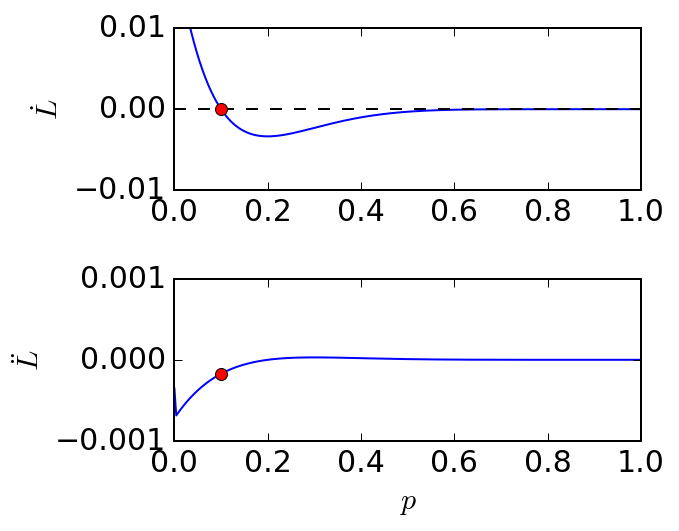

In [5]:
plt.figure(figsize=(5,4))
plt.subplot(211)
plt.plot(p_list,gradient(l_list))
plt.plot(p_list, zeros_like(p_list), 'k--')
for i in range(len(candidate_idx)):
    plt.plot(p_list[candidate_idx[i]], 
             gradient(l_list)[candidate_idx[i]], 'ro')
#plt.plot(p_list)
plt.ylim([-0.01,0.01])
plt.yticks([-0.01, 0, 0.01])
plt.ylabel('$\dot{L}$')

plt.subplot(212)
plt.plot(p_list,gradient(gradient(l_list)))
for i in range(len(candidate_idx)):
    plt.plot(p_list[candidate_idx[i]], 
             gradient(gradient(l_list))[candidate_idx[i]], 'ro')

plt.ylim([-0.001, 0.001])
plt.yticks([-0.001, 0, 0.001])
plt.ylabel('$\ddot{L}$')
plt.xlabel('$p$')
plt.tight_layout()

### Analytical measurement of the MLE


Of course, for the binomial distribution we can directly calculate the log-likelihood analytically. Note that we're just going to drop the $^n C_k$ factor, since it doesn't factor into the minimisation.

$$ L(p\,|\,k) = p^k(1-p)^{n-k}, $$

$$ \ln L(p\,|\,k) = k \ln p + (n-k) \ln (1-p) $$

$$ \frac{\partial}{\partial p} \ln L= \frac{k}{p} - (n-k) \frac{1}{1-p} $$

$$\frac{\partial^2}{\partial p^2} \ln L = -\frac{k}{p^2} - \frac{n-k}{(1-p)^2}$$

This leads to the fairly banal result that

$$(1-p)k = (n-k)p$$
$$ k-pk = np-pk $$
$$ p = k/n $$

### Reparameterisaton

For the ease of numerical optimisation it is often important to reparameterise the likelihood function. Most of the numerical optimisers search over an unconstrained parameter space, so whereas $p$ in our case is defined from $(0,1)$.

One possible transformation is the logistic transformation

$$ \phi = \ln \frac{p}{1-p}. $$

The inverse operation is

$$ p = \frac{e^\phi}{1+e^\phi}. $$

So we may rewrite the binomial loglikelihood 

$$ L(p\,|\,k) = k \ln p + (n-k) \ln (1-p) $$

One trick we can use is to rewrite this expression a little bit...

$$ L(p\,|\,k) = k \ln \frac{p}{1-p} + n \ln (1-p) $$

$$ L(\phi\,|\,k) = k \phi + n \ln \frac{1}{1+e^\phi} $$

/home/beng/anaconda3/lib/python3.5/site-packages/numpy/lib/scimath.py:262: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)


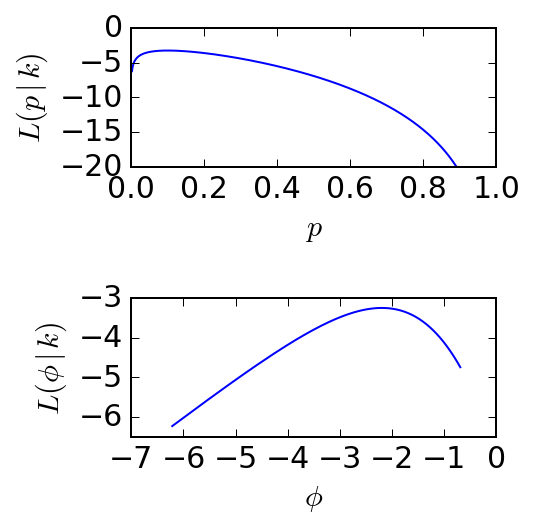

In [6]:
n = 10
k = 1
plt.figure(figsize=(4,4))
plt.subplot(211)
plt.plot(p_list, k*log(p_list)+(n-k)*log(1.-p_list) )
plt.ylim([-20,0])
plt.ylabel('$L(p\,|\,k)$')
plt.xlabel('$p$')

plt.subplot(212)
phi_list = log(p_list/(1+p_list))
plt.plot(phi_list, k*phi_list + n*log(1./(1.+exp(phi_list))))
plt.yticks([-3,-4,-5, -6])
#plt.xticks([-5,-4,-3,-2,-1])
plt.ylabel('$L(\\phi\,|\,k)$')
plt.xlabel('$\\phi$')
plt.tight_layout()

Here we will generate some sample data from a coin toss and then use MLE to work backwards to deduce the coin's bias towards the head. 

In [7]:
from scipy.optimize import fsolve

In [8]:
n = 10
k = 1
ll_phi = lambda phi: k*phi + n*log(1./(1.+exp(phi)))
soln = fsolve(ll_phi, -1)
print(soln)
soln_phi = exp(soln)/(1.+exp(soln))
print(soln_phi)

[-2.19442533]
[ 0.10025221]


/home/beng/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
